# MNIST Example

- 데이터 로딩 및 확인

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [3]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


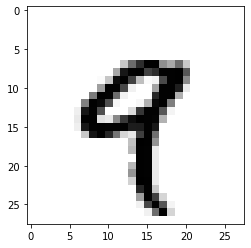

In [7]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary);

- 입력 데이터 변환

In [5]:
train_images = train_images.astype('float32').reshape(60000, 28*28) / 255
test_images = test_images.astype('float32').reshape(10000, 28*28) / 255

- 목표 데이터 변환

In [6]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- 모델 정의

In [7]:
from keras import models
from keras.layers import Dense

model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


- 모델 시각화

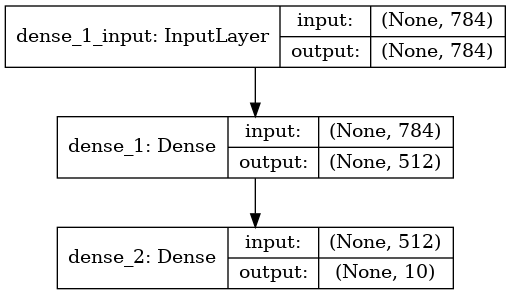

In [8]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

- 컴파일

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델 학습

In [10]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2576 - accuracy: 0.9258
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1029 - accuracy: 0.9692
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0677 - accuracy: 0.9794
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0488 - accuracy: 0.9850
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0378 - accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0288 - accuracy: 0.9913
Epoch 7/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0219 - accuracy: 0.9936
Epoch 8/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0167 - accuracy: 0.9951
Epoch 9/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0129 - accuracy: 0.9962
Epoch 10/10
60000/60000 [==============================

- 성능평가

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 0s 11us/step
0.9817000031471252
